In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
import csv
import io
import math

In [61]:
from google.colab import files
uploaded = files.upload()

Saving data2.txt to data2 (4).txt


In [62]:
data = pd.read_csv(io.BytesIO(uploaded['data2.txt']), header=None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [63]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data['y'] == 0
    pos = data['y'] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='orange', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

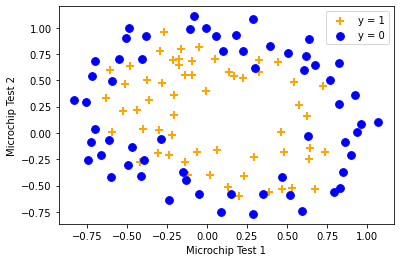

In [64]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [65]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]
# convert to np.array
XX = x.values
Y = y.values

In [66]:
def mapFeature( x1col, x2col):
    degrees = 10
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [67]:
X = mapFeature(XX[:,0],XX[:,1])
print(X.shape, XX.shape)

(118, 66) (118, 2)


In [68]:
from scipy.special import expit #Vectorized sigmoid function

#Hypothesis function and cost function for logistic regression
def h(mytheta,X): #Logistic hypothesis function
    return expit(np.dot(X,mytheta))

In [69]:
#Cost function, default lambda (regularization) 0
def computeCost(mytheta,X,Y,mylambda = 0.): 

    m = Y.size # number of training examples

    term1 = np.dot(-np.array(Y).T,np.log(h(mytheta,X)))
    term2 = np.dot((1-np.array(Y)).T,np.log(1-h(mytheta,X)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [70]:
def sigmoid(param):
    param = np.clip( param, -500, 500 )           # protect against overflow
    res = 1.0/(1.0+np.exp(-param))
    return res

In [71]:
def myFunction(X, Y, theta):
  row,col = Y.shape
  cost = np.zeros(col)

  for i in range(row):
    sig = sigmoid(np.dot(X[i], theta))  
    error  = sig  - Y[i]                      
    for j in range(col):
      cost[j] = cost[j] + error * X[i,j]

  return cost

In [72]:
initial_theta = np.zeros(X.shape[1])

def optimizeRegularizedTheta(theta1, X, Y, alpha, epoch, lambda1=0.):
    m = Y.shape[0]
    costs = []
    
    for i in range(epoch):
      cost = myFunction(X, Y, theta1)
      thetas = theta1 * (1 - (lambda1 /m )) - (alpha / m) * cost
      costs.append( computeCost(thetas, X, Y, lambda1) )

    return thetas,min(costs)

thetas,min_cost = optimizeRegularizedTheta(initial_theta,X,Y,0.1,100)
print(thetas.shape)
print(min_cost)

(66,)
0.6925320758380589


In [73]:
def plotBoundary(mytheta, X, Y, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(mytheta,X,Y,0.1,1000,mylambda)
    print(theta, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
            # print(type(zvals), zvals.shape)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

[-0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746] 

Cost :  0.6925320758380589 
 
 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: No contour levels were found within the data range.


[-0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746] 

Cost :  0.6925322736430924 
 
 
[-0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746 -0.00084746
 -0.00084746 -0.

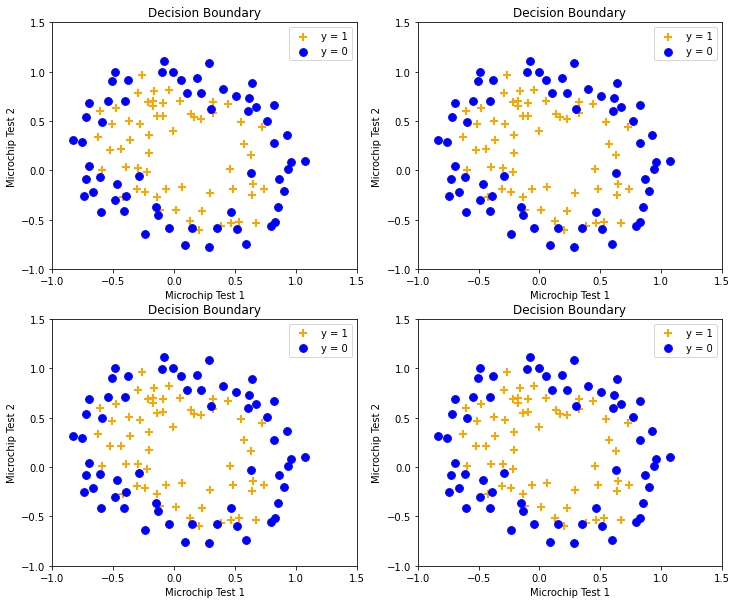

In [74]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,X,Y,0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,X,Y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,X,Y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,X,Y,50.)